In [1]:
from pulp import *

prob = LpProblem("売上", sense=LpMaximize)

fish = LpVariable(
    "焼魚弁当",
    lowBound=0,
    cat="Integer"
)
meat = LpVariable(
    "焼肉弁当",
    lowBound=0,
    cat="Integer"
)

In [2]:
prob += 300 * fish + 900 * meat

prob += 15 * fish + 160 * meat <= 605
prob += 35 * fish + 45 * meat <= 755

prob.solve()

print(fish.value(), meat.value())

19.0 2.0


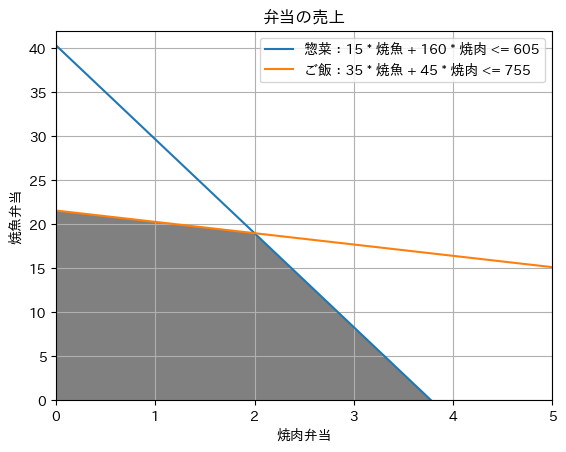

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

# ステップ1
x = np.arange(0, 5, 0.01)
y1 = (605 / 15) - (160 / 15) * x
y2 = (755 / 35) - (45 / 35) * x
y3 = np.zeros_like(x)
y4 = np.minimum(y1, y2)

# ステップ2
plt.figure()
plt.plot(x, y1, label="惣菜：15 * 焼魚 + 160 * 焼肉 <= 605")
plt.plot(x, y2, label="ご飯：35 * 焼魚 + 45 * 焼肉 <= 755")
plt.fill_between(
    x,
    y3,
    y4,
    where=y4 > y3,
    facecolor="gray",
)
plt.title("弁当の売上")
plt.xlabel("焼肉弁当")
plt.ylabel("焼魚弁当")
plt.ylim(0, 42)
plt.xlim(0, 5)
plt.legend(loc=0)
plt.grid()
plt.show()

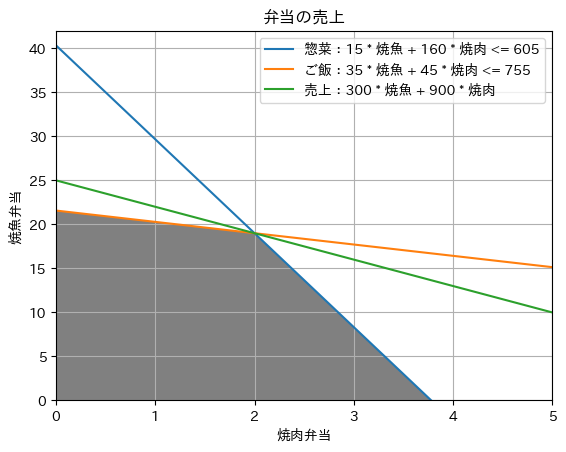

In [4]:
x = np.arange(0, 5, 0.01)
y1 = (605 / 15) - (160 / 15) * x
y2 = (755 / 35) - (45 / 35) * x
y3 = np.zeros_like(x)
y4 = np.minimum(y1, y2)
y5 = -(900 / 300) * x + (7500 / 300)


plt.figure()
plt.plot(x, y1, label="惣菜：15 * 焼魚 + 160 * 焼肉 <= 605")
plt.plot(x, y2, label="ご飯：35 * 焼魚 + 45 * 焼肉 <= 755")
plt.plot(x, y5, label="売上：300 * 焼魚 + 900 * 焼肉")

plt.fill_between(
    x,
    y3,
    y4,
    where=y4 > y3,
    facecolor="gray",
)
plt.title("弁当の売上")
plt.xlabel("焼肉弁当")
plt.ylabel("焼魚弁当")
plt.ylim(0, 42)
plt.xlim(0, 5)
plt.legend(loc=0)
plt.grid()
plt.show()